# *BEATS CT reconstruction pipeline - Paganin phase retrieval*
Minimal [TomoPy](https://tomopy.readthedocs.io/en/latest/) reconstruction pipeline for **phase contrast** data collected at the [BEATS beamline](https://beats-sesame.eu/) of [SESAME](https://www.sesame.org.jo/).

| Sample: Byzantine glass   |                             |
|:-----------------------|:-------------------------------|
| Scan name              | glass_room-M-20240222T115704   |
| Energy                 | 20 keV                         |
| Detector               | Det 2 (Hasselblad system)      |
| Camera                 | ORYX FLIR 7.1 MP GigE          |
| Voxel size             | 4.5 um                         |
| SDD                    | 250 mm                         |
| Field of view extension | 360-degree x 3 stitch scans |

Created on:  22.02.2024 <br />
Last update: 19.05.2024 <br />

- Code license: MIT
- Narrative license: CC-BY-NC-SA

Type `Ctrl` + `Enter` on a single cell to run it.

## Load experiment data
Enter the **sample_name** and the correct **output_dir** 

In [118]:
sample_name = "glass_room-M-20240222T115704"
work_dir = os.path.join("/", "PETRA", "SED", "BEATS", "IH", "2024")
h5file = os.path.join(work_dir, sample_name, f'{sample_name}.h5')

flats_file = "glass_room-M_flat-20240222T120435"
h5file_flats = os.path.join(work_dir, flats_file, f'{flats_file}.h5')

output_dir = os.path.join(f'{work_dir}_recon', sample_name)
recon_dir = output_dir+"/recon/"
cor_dir = output_dir+"/cor/"

### Load the complete dataset (or)

In [107]:
# projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0)

### Read a portion of the dataset
- `sino` controls the vertical detector lines to read - `sino=(10, 2161, 1)`
- `proj` defines the range of projections - `proj=(1, 401, 1)`

In [108]:
proj_0 = 000
proj_1 = proj_0+1751

In [109]:
sino = (790, 800, 1)
# projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, sino=(1200, 1250, 1), proj=(proj_0, proj_1, 1))
projs, _, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, sino=sino)
_, flats, _, _ = dxchange.read_aps_32id(h5file_flats, exchange_rank=0, sino=sino)
# theta = theta[proj_0:proj_1]

print("Dataset size: ", projs[:, :, :].shape[:], " - dtype: ", projs.dtype)
print("Flat fields size: ", flats[:, :, :].shape[:])
print("Dark fields size: ", darks[:, :, :].shape[:])
print("Theta array size: ", theta.shape[:])

INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M-20240222T115704/glass_room-M-20240222T115704.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M-20240222T115704/glass_room-M-20240222T115704.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M-20240222T115704/glass_room-M-20240222T115704.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M-20240222T115704/glass_room-M-20240222T115704.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_flat-20240222T120435/glass_room-M_flat-20240222T120435.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_flat-20240222T120435/glass_room-M_flat-20240222T120435.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_flat-20240222T120435/glass_room-M_flat-20240222T120435.h5
INFO:dxchange.reader:Data

Dataset size:  (4001, 10, 3208)  - dtype:  uint16
Flat fields size:  (101, 10, 3208)
Dark fields size:  (101, 10, 3208)
Theta array size:  (4001,)


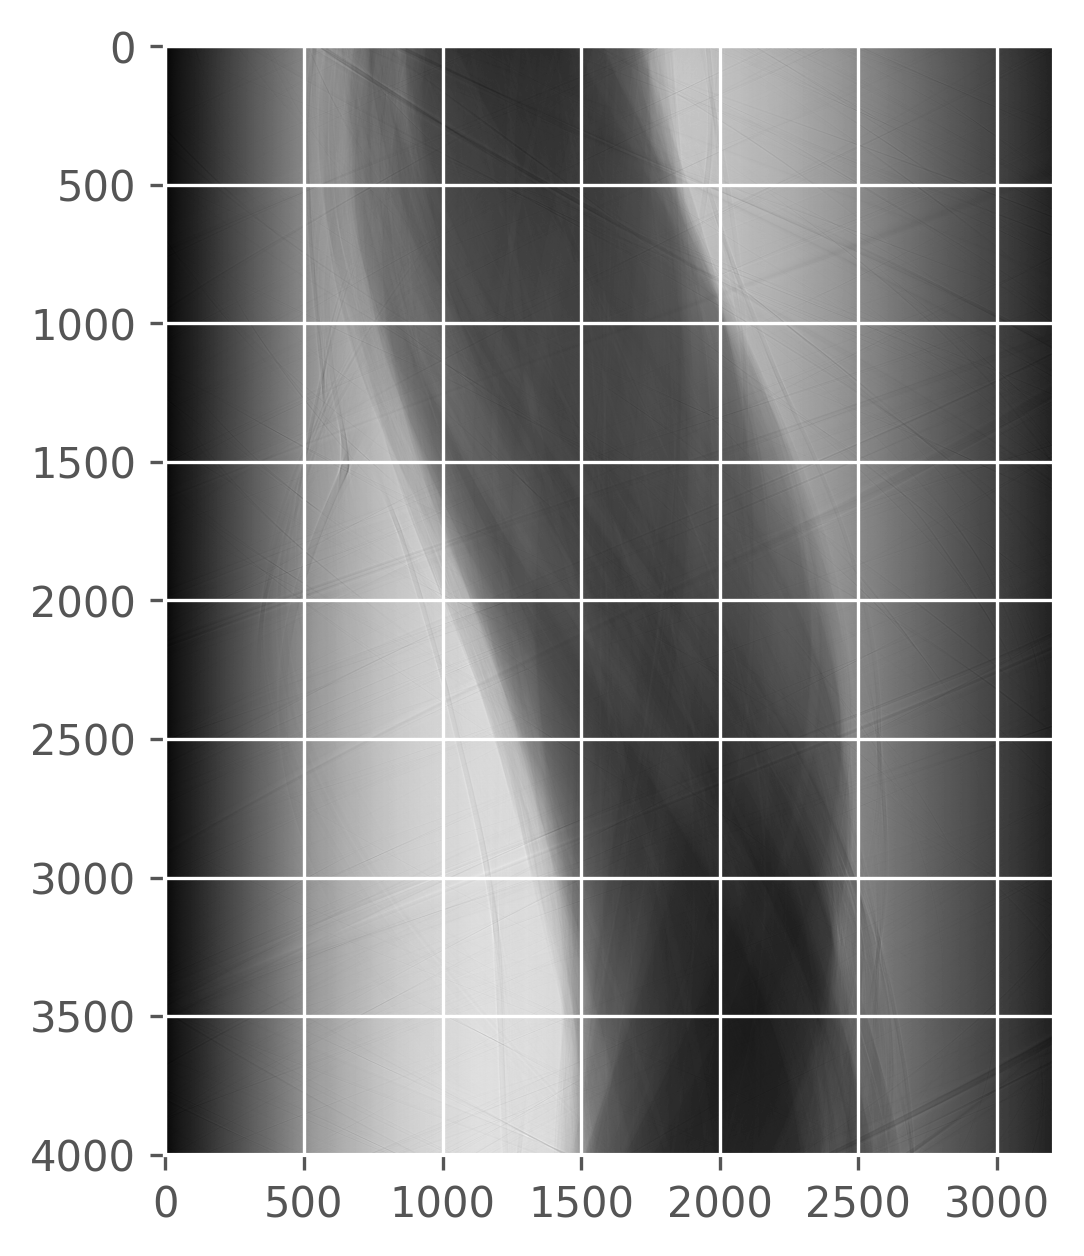

In [110]:
plt.imshow(projs[:,int(projs.shape[1]/2),:])

# try stitching

In [349]:
sample_name = "glass_room-M_stitch-20240222T153555"
#sample_name = 'glass_room-M_stitch-20240222T154047'
work_dir = os.path.join("/", "PETRA", "SED", "BEATS", "IH", "2024")
h5file = os.path.join(work_dir, sample_name, f'{sample_name}.h5')

flats_file = "glass_room-M_stitch_flats-20240222T153030"
h5file_flats = os.path.join(work_dir, flats_file, f'{flats_file}.h5')

output_dir = os.path.join(f'{work_dir}_recon', sample_name)
recon_dir = output_dir+"/recon/"
cor_dir = output_dir+"/cor/"

In [350]:
sino = (900, 920, 1)
# projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, sino=(1200, 1250, 1), proj=(proj_0, proj_1, 1))
projs, _, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, sino=sino)
_, flats, _, _ = dxchange.read_aps_32id(h5file_flats, exchange_rank=0, sino=sino)
# theta = theta[proj_0:proj_1]

print("Dataset size: ", projs[:, :, :].shape[:], " - dtype: ", projs.dtype)
print("Flat fields size: ", flats[:, :, :].shape[:])
print("Dark fields size: ", darks[:, :, :].shape[:])
print("Theta array size: ", theta.shape[:])

INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch-20240222T153555/glass_room-M_stitch-20240222T153555.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch-20240222T153555/glass_room-M_stitch-20240222T153555.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch-20240222T153555/glass_room-M_stitch-20240222T153555.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch-20240222T153555/glass_room-M_stitch-20240222T153555.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch-20240222T153555/glass_room-M_stitch-20240222T153555.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch_flats-20240222T153030/glass_room-M_stitch_flats-20240222T153030.h5
INFO:dxchange.reader:Data successfully imported: /PETRA/SED/BEATS/IH/2024/glass_room-M_stitch_

Dataset size:  (8001, 20, 3208)  - dtype:  uint16
Flat fields size:  (101, 20, 3208)
Dark fields size:  (101, 20, 3208)
Theta array size:  (8001,)


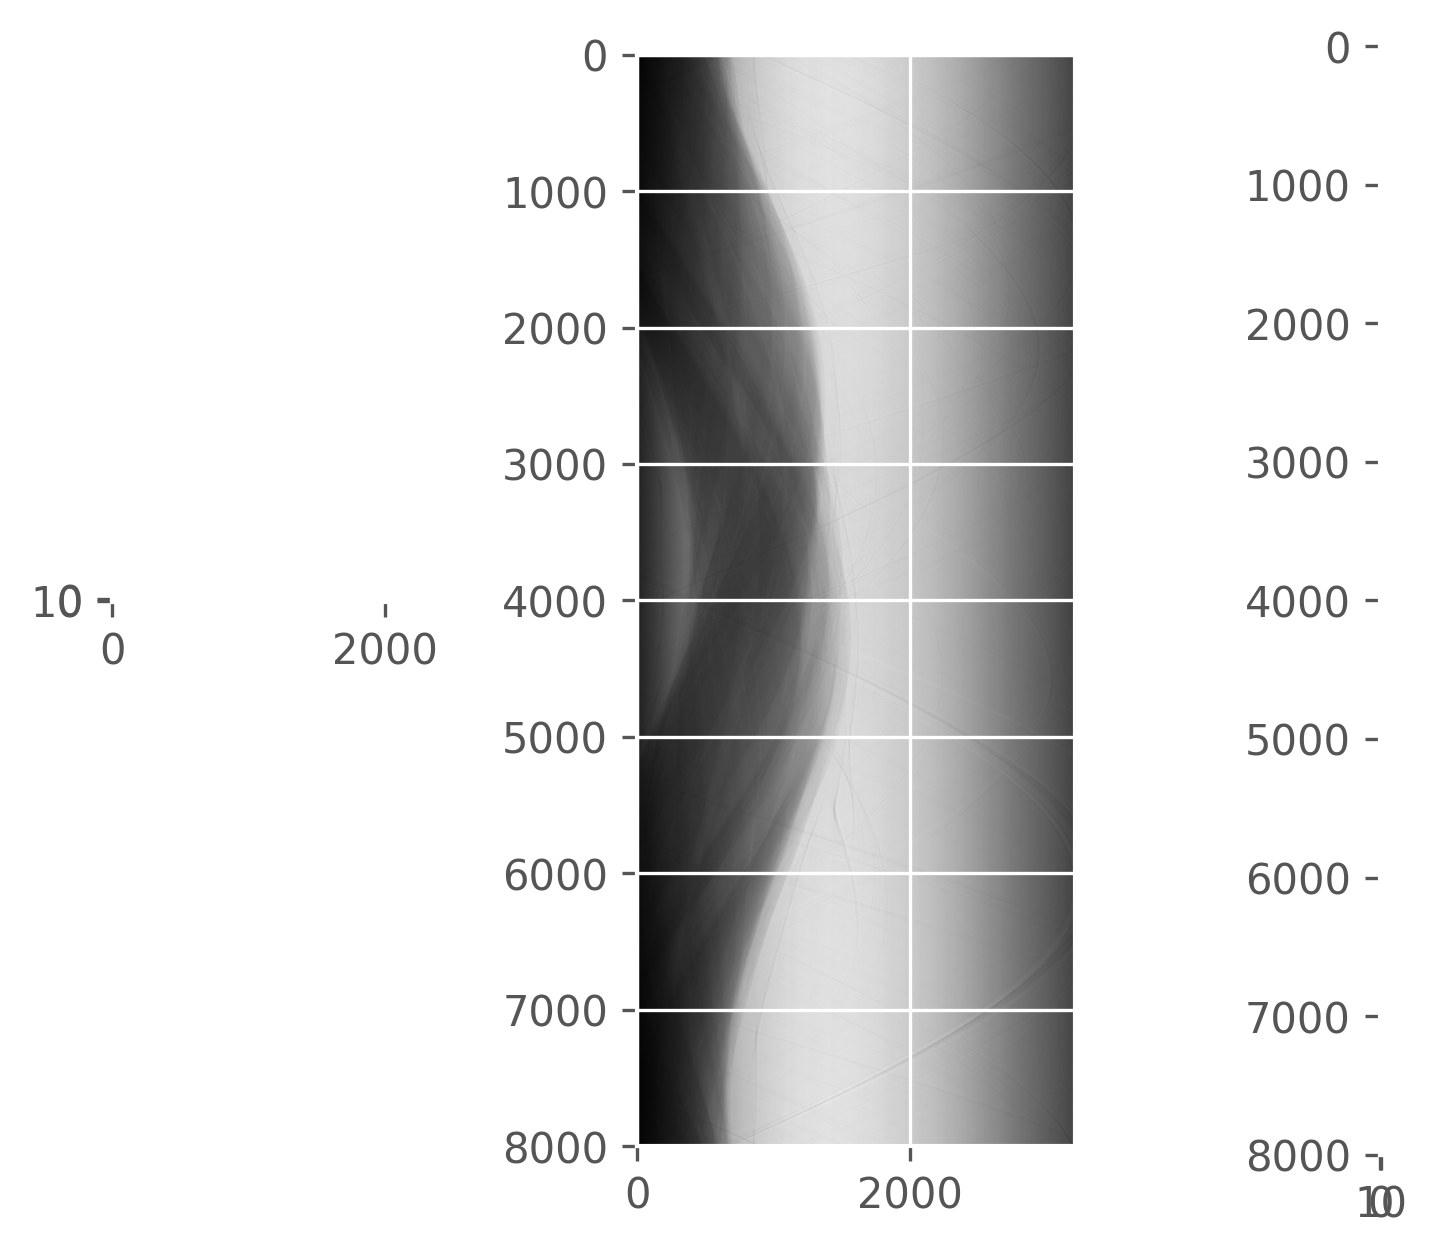

In [351]:
ru.plot_midplanes(projs)

## Flat field correction
Normalize the image background.

In [352]:
# """
# np.mean(flats[0], axis=0).shape
# flats_ = np.array([np.mean(flat, axis=0) for flat in flats])
# flats_ = np.mean(flats_, axis=0)
# flats_.shape
# """
# np.mean(flats, axis=2).shape, flats.shape, projs.shape, darks.shape, flats[0].shape

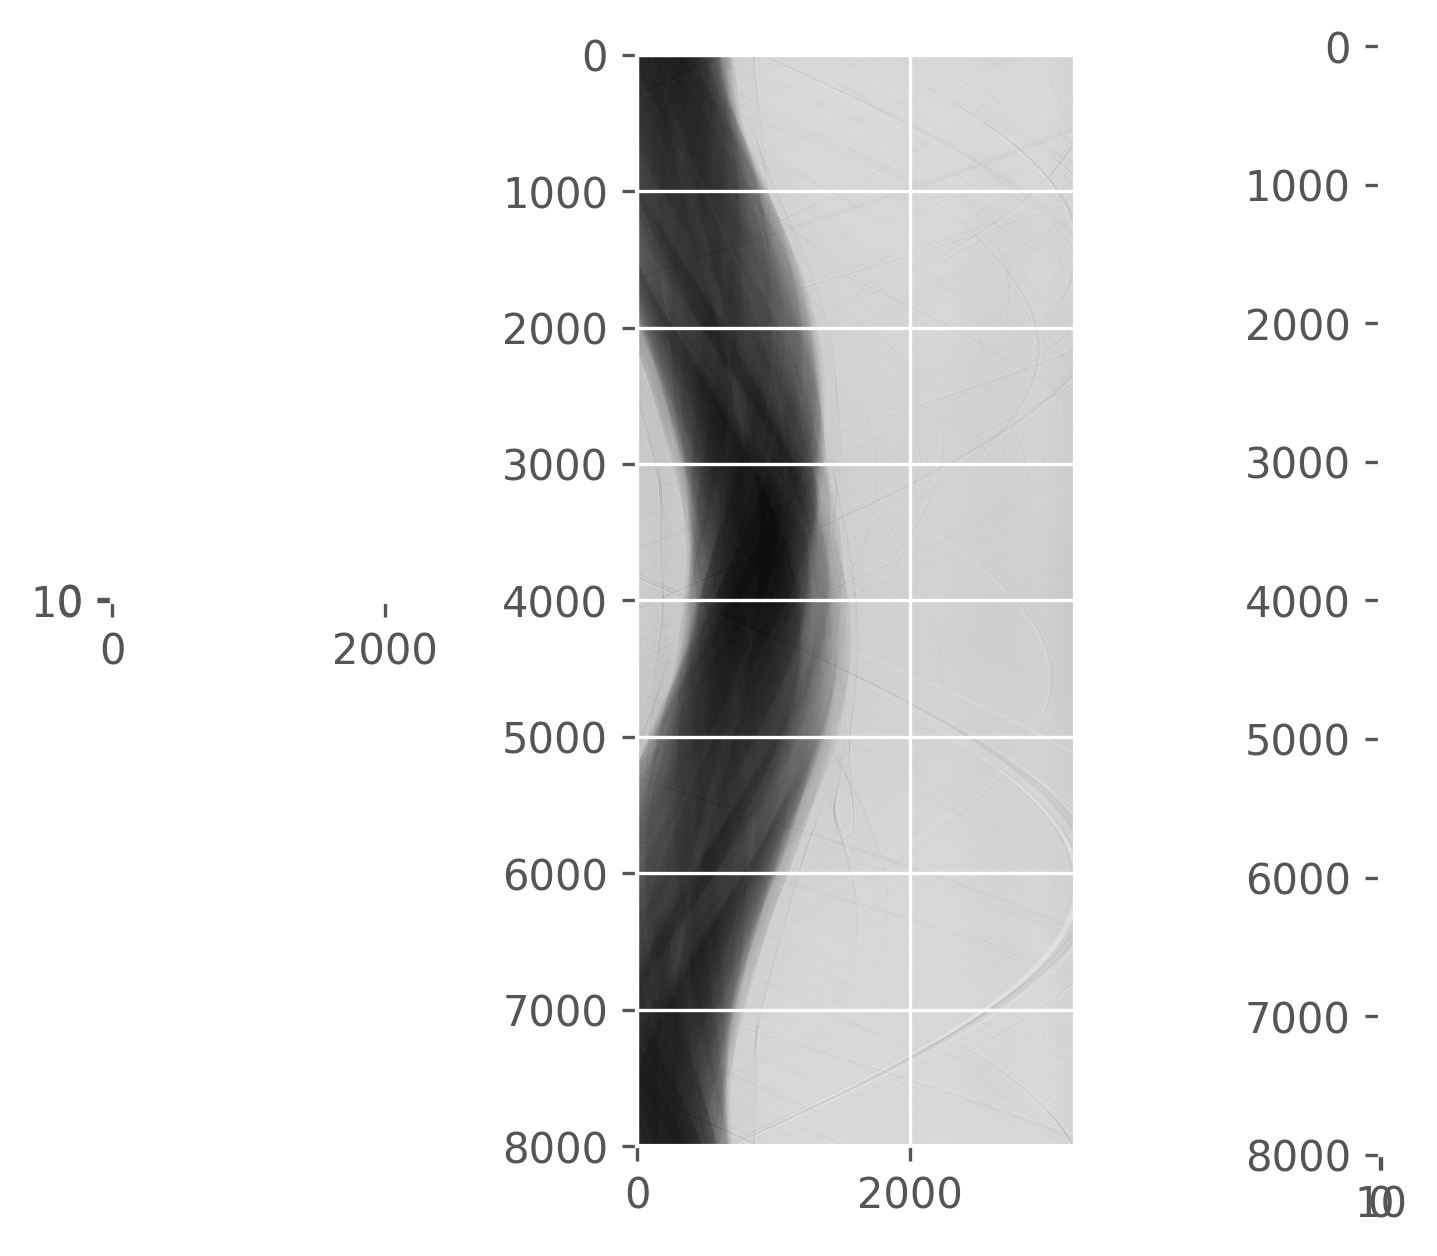

In [353]:
projs = tomopy.normalize(projs, flats, darks, ncore=ncore, averaging='median')
# projs = tomopy.normalize(projs, np.average(flats, axis=2), darks, ncore=ncore, averaging='median')
ru.plot_midplanes(projs)

In [362]:
overlap = int(3208/2/4)
overlap = 1047
print(overlap)
projs_ = tomopy.sino_360_to_180(projs, overlap=overlap, rotation='left')
projs_.shape

1047


(4000, 20, 5369)

plt.imshow(projs_[1000:1800, 10, 1800:2800], cmap='jet')

## Simulate theta array

In [363]:
theta = tomopy.angles(projs_.shape[0])

## Phase retrieval

In [65]:
delta_beta = 1266 # 250 # ratio between real and imaginary part of the refractive index
alpha=1./(4*3.141592**2 * delta_beta)
print("alpha: ", alpha)

alpha:  2.000814095594359e-05


In [364]:
alpha = 0.0002 # 0.0001 # 0.00008 # 0.0002 # 0.0008

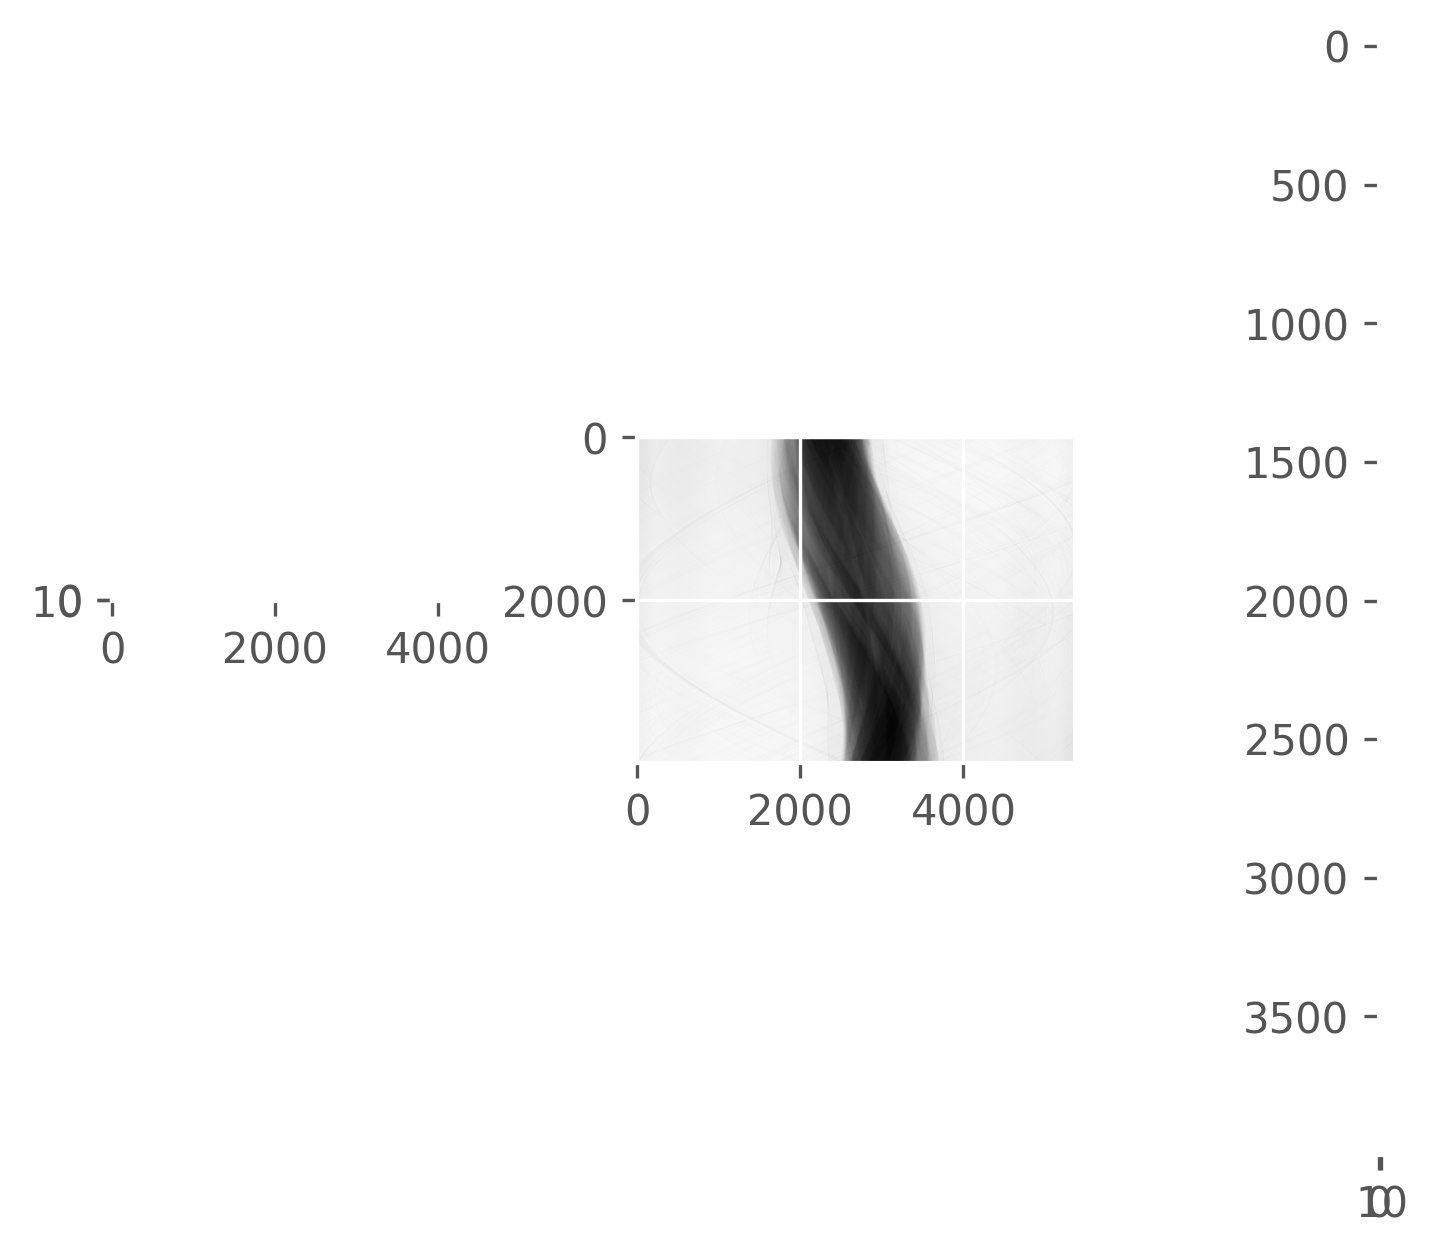

In [365]:
projs_ = tomopy.retrieve_phase(projs_[:, :, :],
                              pixel_size=1e-4*4.5,
                              dist=25,
                              energy=20,
                              alpha=alpha,
                              ncore=ncore,
                              pad=True)
# nchunk=None,

ru.plot_midplanes(projs_)

In [367]:
projs_.dtype

dtype('float32')

## Log transform
Calculate $ -log(projs) $ to linearize transmission tomography data.

In [368]:
projs_ = tomopy.minus_log(projs_, ncore=ncore)

## Center Of Rotation (COR)images

In [115]:
COR = [1610, 1620, 0.5]

In [119]:
tomopy.write_center(projs, theta, cor_dir, COR)

INFO:tomopy.recon.algorithm:Reconstructing 20 slice groups with 20 master threads...


View them in Fiji

In [120]:
os.system(Fiji_exe_stack + cor_dir+'{:04.2f}'.format(COR[0])+'.tiff &')

0

OpenJDK 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
OpenJDK 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release


[INFO] Detected existing ImageJ; passing arguments along
Importing .TIFF sequence:
/PETRA/SED/BEATS/IH/2024_recon/glass_room-M-20240222T115704/cor/1610.00.tiff
Done.


Manually insert the best `COR`

In [88]:
COR = 1615.50 # 1602.5

For 360 degrees scans the cor is in the center

In [373]:
COR = int(projs_.shape[2]/2)
print(COR)

2684


## Reconstruction
### GPU reconstruction with the ASTRA toolbox
|  |  |
| :--- | :--- |
| **Algorithm**      | `fbp CUDA ASTRA` |

In [374]:
recon = tomopy.recon(projs_,
                     theta,
                     center=COR,
                     algorithm='gridrec',
                     ncore=36)
print(recon_dir)

INFO:tomopy.recon.algorithm:Reconstructing 20 slice groups with 20 master threads...


/PETRA/SED/BEATS/IH/2024_recon/glass_room-M_stitch-20240222T153555/recon/


## Write reconstructed dataset
Write output tiff stack as `float32`

In [378]:
fileout = recon_dir+'slice.tiff'
fileout = f'{recon_dir[:-1]}_phase_alpha0.0002'+'/slice.tiff'
print(fileout)
dxchange.writer.write_tiff_stack(recon, fname=fileout, axis=0, digit=4, start=0, overwrite=True)


/PETRA/SED/BEATS/IH/2024_recon/glass_room-M_stitch-20240222T153555/recon_phase_alpha0.0002/slice.tiff


Open virtual stack in ImageJ

In [380]:
os.system(Fiji_exe_stack + fileout + ' &')

0

OpenJDK 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
OpenJDK 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release
